In [384]:
import torch
from torch.autograd import variable
from torch.autograd import Variable
import torchvision.models as models
import numpy as np

from itertools import count
import torch. autograd 
import torch.nn.functional as F 

import matplotlib. pyplot as plt

from sklearn.datasets import load_iris
from torch.optim import SGD
import torch.utils.data as Data
from torch.utils.data import DataLoader
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torchvision import datasets
from torchvision import transforms
import torch.nn as nn
import jieba

In [50]:
torch.cuda.is_available()

True

In [36]:
# tensor，张量
x = torch.Tensor(5,3)
x

tensor([[-1.8182e-34,  4.5876e-41,  2.8193e-06],
        [ 3.0886e-41,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  1.8788e+31,  1.7220e+22],
        [ 1.5109e-07,  1.7585e-04,  1.0083e-11]])

In [30]:
x.size()

torch.Size([5, 3])

In [31]:
# tensor转numpy
y = x.numpy()

In [32]:
type(y)

numpy.ndarray

In [33]:
# numpy转tensor
z = torch.from_numpy(y)

In [34]:
z

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [380]:
# 矩阵乘法
mat1 = torch.randn(2, 3)
mat2 = torch.randn(3, 3)
torch.mm(mat1, mat2)

tensor([[-0.4239, -1.4421,  2.1475],
        [-0.8305, -0.4890,  6.7356]])

# Variable对象
包括3个子对象：data（数据）,grad(传播梯度，延迟分配),creator（创建这个variable的函数引用，可以回溯整个创建链路，如果 是 用户 创建 的 Variable， 其 creator 为 None， 同时 这种 Variable 称作 Leaf Variable， autograd 只会 给 Leaf Variable 分配 梯度。）

In [47]:
x = torch.rand(4)
x = variable(x, requires_grad = True)
y = x * 3
# 通常取较小的值:为[ 1, 0. 1, 0. 01, 0. 001]
grad_variables = torch.FloatTensor([1,2,3,4])
y.backward(grad_variables)
x.grad

tensor([ 3.,  6.,  9., 12.])

In [56]:
torch. cuda. device

torch.cuda.device

In [58]:
# cuda,默认情况不支持跨cpu操作，可以使用copy_()，除非启用 对等 存储器 访问， 否则 对于 分布 不同 设备 上 的 张量， 任何 启动 操作 的 尝试 都将 引发 错误。
x = x.cuda()
y = y.cuda()
x + y

tensor([2.7548, 2.3314, 2.1470, 0.7294], device='cuda:0',
       grad_fn=<AddBackward0>)

# 模型保存与加载
内置pickle包，save，load("model.pkl")函数

In [63]:
ResNet18 = models.resnet18( pretrained= True) 

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/hdw/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [64]:
alexnet = models.alexnet(pretrained = True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /home/hdw/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [66]:
squeezenet = models.squeezenet1_0( pretrained=True) 

Downloading: "https://download.pytorch.org/models/squeezenet1_0-a815701f.pth" to /home/hdw/.cache/torch/hub/checkpoints/squeezenet1_0-a815701f.pth


In [68]:
vgg16 = models.vgg16( pretrained= True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/hdw/.cache/torch/hub/checkpoints/vgg16-397923af.pth


In [79]:
densenet = models.densenet161(pretrained= True)

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /home/hdw/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


In [80]:
inception = models. inception_v3( pretrained= True) 

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /home/hdw/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


In [84]:
# 参考：https://blog.csdn.net/qq_34243930/article/details/107268945
# pretrained_dict = torch.utils.model_zoo.load_url( model_urls['resnet134']) 

In [83]:
# 保存模型参数
# saved_model.state_dict()

In [168]:
random_state = 5000
torch.manual_seed(random_state)
POLY_DEGREE = 4
W_target = torch.randn(POLY_DEGREE, 1) * 5
b_target = torch.randn(1) * 5

In [169]:
W_target,b_target

(tensor([[6.1301],
         [3.8924],
         [0.8614],
         [8.2049]]), tensor([-1.6233]))

In [181]:
def make_features(x):
    """创建一个特征矩阵结构为[x, x^2, x^3, x^4]."""
    # tensor([1,2,3])变成tensor([[1],[2],[3],[4]])
    x = x.unsqueeze(1)
    # 矩阵根据每一唯独计算 x^i次方，然后cat(x,1)拼成相关特征
    return torch.cat([x ** i for i in range(1, POLY_DEGREE + 1)], 1)

def f(x):
    """近似函数."""
    # 矩阵标准乘法
    return x.mm(W_target) + b_target[0]

def poly_desc(W, b):
    """生成多向式描述内容."""
    result = 'y = '
    for i, w in enumerate(W):
        result += '{:+.2f} x^{} '.format(w, len(W) - i)
    result += '{:+.2f}'.format(b[0])
    return result

def get_batch(batch_size=32):
    """创建类似 (x, f(x))的批数据."""
    random = torch.from_numpy(np.sort(torch.randn(batch_size)))
    x = make_features(random)
    y = f(x)
    return Variable(x), Variable(y)

In [182]:
# 声明模型
fc = torch.nn.Linear(W_target.size(0), 1)

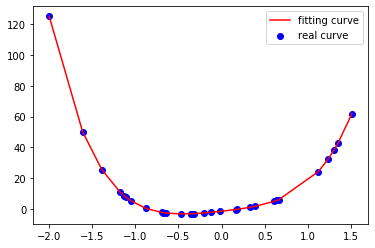

Loss: 0.000239 after 1 batches
==> Learned function:	y = +6.16 x^4 +3.88 x^3 +0.85 x^2 +8.21 x^1 -1.62
==> Actual function:	y = +6.13 x^4 +3.89 x^3 +0.86 x^2 +8.20 x^1 -1.62


In [186]:
for batch_idx in count(1):
    # 获取数据
    batch_x, batch_y = get_batch()

    # 重置求导
    fc.zero_grad()

    # 前向传播
    output = F.smooth_l1_loss(fc(batch_x), batch_y)
    
    if output.data.size() == torch.Size([]):
        loss = output.data.item()
    else:
        loss = output.data[0]
    

    # 后向传播
    output.backward()

    # 应用导数
    for param in fc.parameters():
        # 学习率与曲线
        param.data.add_(-0.1 * param.grad.data)

    # 停止条件
    if loss < 1e-3:
        plt.cla()
        plt.scatter(batch_x.data.numpy()[:, 0], batch_y.data.numpy()[:, 0], label='real curve', color='b')
        plt.plot(batch_x.data.numpy()[:, 0], fc(batch_x).data.numpy()[:, 0], label='fitting curve', color='r')
        plt.legend()
        plt.show()
        break

print('Loss: {:.6f} after {} batches'.format(loss, batch_idx))
print('==> Learned function:\t' + poly_desc(fc.weight.data.view(-1), fc.bias.data))
print('==> Actual function:\t' + poly_desc(W_target.view(-1), b_target))

In [210]:
m = torch.nn.Hardtanh(-2, 2)
input = Variable(torch.randn(2) * 3)
print(input)
print(m(input))


tensor([ 0.2660, -3.7375])
tensor([ 0.2660, -2.0000])


In [214]:
m = torch.nn.ReLU()
input = Variable(torch.randn(2) * 3)
print(input)
print(m(input))


tensor([-4.1278,  0.9082])
tensor([0.0000, 0.9082])


In [218]:
# 给定的维度：如行
m = torch.nn.Softmax(dim=0)
input = Variable(torch.randn(2) * 3)
print(input)
print(m(input))

tensor([-0.6092,  0.6982])
tensor([0.2129, 0.7871])


# 激活函数/损失函数
## 激活函数
1） Sigmod: 缺点也明显：导致梯度消失（有效范围太短，值很大很小的时候，变化趋于平缓），输出非0均值。输出都是正值，梯度也是正值，导致锯齿型。 导数涉及除法，训练过程反向传播时计算量特别大

2） Tanh，双曲三角函数$tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$;相比sigmod有改进，但是依然没有解决梯度消失问题，本质上是：$tanh(x) = 2 * sigmod(x) - 1$;最好不在隐含层使用，梯度消失。可以在输出层使用。

3）Hard Tanh:$f(x) =\left\{\begin{matrix}
+1, x > 1\\ 
-1, x < -1\\ 
x, other
\end{matrix}\right.$

4）ReLU：$f(x) = max(0, x)$;模仿生物（对一部分信号忽略，对一部分信号产生反映），也有缺点，会死（训练一段时间后，只会输出0,尤其是学习率很大的时候，也就是一个很大数据流过后，可能变为0,梯度都是负数了），pytorch有一个参数inplace用来选择是否进行覆盖运算

还有很多改进版：Leaky ReLU,小于0时不再输出0：$f(x) =max(\alpha x, x)$，实际并未总是优于ReLU

Parametric ReLU:（上述参数是学习出来的）

ELU：$f(x) =\left\{\begin{matrix}
\alpha(exp(x) - 1), x < 0\\ 
x, other
\end{matrix}\right.$，虽然拥有所有有点，但是实际证明也并未总是好于ReLU，计算还比较慢，因为有指数运算。收敛会快一点。



5） Maxout：会导致参数K倍增长

6）Softmax：http://ufldl.stanford.edu/tutorial/supervised/SoftmaxRegression/，需要加上正则项，不是严格非凸

7）LogSoftmax：增加log


## 损失函数
torch.nn.MSELoss

L1Loss

BCELoss/BCEWithLogitsLoss

NLLLoss:多分类负对数似然，输出层要用LogSoftmax

CrossEntropyLoss：为NLLLoss与LogSoftmax的组合


In [232]:
loss = torch.nn.MSELoss()
input = torch.randn(3, 5, requires_grad=True)
print(input)
target = torch.randn(3, 5)
print(target)
output = loss(input, target)
print(output)
output.backward()
print(loss)

tensor([[ 0.5156, -0.0207, -1.3788,  1.7564,  0.9307],
        [-0.0664,  1.2450, -1.4570, -1.4603,  0.0154],
        [ 1.1116, -0.8455, -1.3862,  0.5650, -0.6280]], requires_grad=True)
tensor([[-0.0933,  0.6185, -0.6048,  1.7726,  0.7905],
        [ 0.5479, -1.7936, -1.3707,  2.2451, -0.5487],
        [-0.3365,  0.5921,  0.1383,  0.6683,  0.1583]])
tensor(2.1454, grad_fn=<MseLossBackward>)
MSELoss()


In [233]:
# L1 Loss
loss = torch.nn.L1Loss()
input = torch.randn(3, 5, requires_grad=True)
print(input)
target = torch.randn(3, 5)
print(target)
output = loss(input, target)
print(output)
output.backward()
print(loss)

tensor([[ 1.2386, -0.0333, -0.5465, -0.6898,  0.1318],
        [ 0.0706, -0.3355, -2.2194,  0.2243,  1.3485],
        [ 0.1336, -0.0866, -0.5319,  0.0630, -1.7073]], requires_grad=True)
tensor([[ 0.1670,  0.3214, -1.1593,  1.6702,  0.2661],
        [ 0.8003, -0.7230,  1.3708,  0.1533,  0.3557],
        [-2.5627,  0.1323,  0.5003, -1.4135, -0.6439]])
tensor(1.1195, grad_fn=<L1LossBackward>)
L1Loss()


In [236]:
# 二项 交叉熵 Loss
m = torch.nn.Sigmoid()
loss = torch.nn.BCELoss()
input = torch.randn(3,requires_grad=True)
print(input)
target = torch.empty(3).random_(3, 5)
print(target)
output = loss(m(input), target)
print(output)
output.backward()
print(loss)

tensor([ 5.7415e-01, -9.3431e-04,  9.7947e-01], requires_grad=True)
tensor([3., 4., 3.])
tensor(-0.5484, grad_fn=<BinaryCrossEntropyBackward>)
BCELoss()


In [ ]:
# BCEWithLogitsLoss,同BCELoss，用于二分类，只是Sigmod集成到函数里了 

# 数据准备
torch.utils.data.DataSet:在定义Dataset的子类时, 必须重载两个函数:_len_ 和_getitem_。_len_返回数据集大小，_getitem_实现数据下标索引，返回对应的图像与标记

torch.utils.data.DataLoader加载数据，并进行采样，生成batch迭代器

use_cuda:  True
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(150, 4)
(150,)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])
Net(
  (hidden): Linear(in_features=4, out_features=5, bias=True)
  (predict): Linear(in_features=5, out_features=4, bias=True)
)


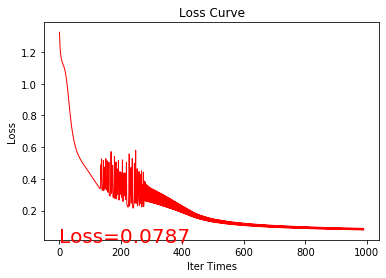

In [277]:
# 只有一个隐藏层的神经网络
# GPU 是否可用
use_cuda = torch.cuda.is_available()
print("use_cuda: ", use_cuda)
# 加载数据集
iris = load_iris()
print(iris.keys())

x = iris['data']  # 特征信息
y = iris['target']  # 目标分类
print(x.shape)  # (150, 4)
print(y.shape)  # (150,)

x = torch.FloatTensor(x)
y = torch.LongTensor(y)
print(y)
x, y = Variable(x), Variable(y)

# 需要继承module，且重写forward方法
class Net(torch.nn.Module):
    """
    定义网络
    """

    def __init__(self, n_feature, n_hidden, n_output):
        """
        初始化函数，接受自定义输入特征维数，隐藏层特征维数，输出层特征维数
        """
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)  # 一个线性隐藏层
        self.predict = torch.nn.Linear(n_hidden, n_output)  # 线性输出层

    def forward(self, x):
        """
        前向传播过程
        """
        x = F.sigmoid(self.hidden(x))
        x = self.predict(x)
        out = F.log_softmax(x, dim=1)
        return out
    
# iris 中输入特征 4 维，隐藏层和输出层可以自己选择
net = Net(n_feature=4, n_hidden=5, n_output=4)
# 查看网络结构
print(net)
# 如果GPU可用 训练数据和模型都放到GPU上，注意：数据和网络是否在GPU上要同步
if use_cuda:
    x = x.cuda()
    y = y.cuda()
    net = net.cuda()
# 定义优化器:不同参数，loss不同
optimizer = SGD(net.parameters(), lr=0.5, momentum=0)

# 记录要绘制的数据
px, py = [], []
#plt.rcParams['font.sans-serif'] = ['STSong']  # 用来正常显示中文标签
#plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
iter_num = 1000
for i in range(iter_num):
    # 数据集传入网络前向计算
    prediction = net(x)

    # 计算loss
    loss = F.nll_loss(prediction, y)
    # 这里也可用CrossEntropyLoss
    # loss = loss_func(prediction, y)
    # 清除网络状态梯度
    optimizer.zero_grad()
    # loss 反向传播
    loss.backward()
    # 更新参数
    optimizer.step()
    # 打印并记录当前的index 和 loss
    #print(i, "loss:", loss.data)
    #print(i, " loss: ", loss.data.item())
    px.append(i)
    py.append(loss.data.item())
    
    if i % 10 == 0:
        # 动态画出loss走向 结果：loss.png
        plt.cla()
        plt.title('Loss Curve')
        plt.xlabel('Iter Times')
        plt.ylabel('Loss')
        plt.plot(px, py, 'r-', lw=1)
        plt.text(0, 0, 'Loss=%.4f' % loss.data.item(), fontdict={'size': 20, 'color': 'red'})
        #plt.pause(0.01)
    if i == iter_num - 1:
        # 最后一个图像定格
        plt.show()

# 深度神经网络

## 综述
2006年大婶Geoffrey Hinton在深度信念网络提出的“贪婪逐层预训练”算法使深度学习网络训练成为可能

难以训练问题，以sigmod激活函数为例：

Sigmod激活函数存在梯度消失与梯度爆炸问题，可以参考：https://zhuanlan.zhihu.com/p/25631496 核心是链式求导出现连乘，每层$w {\sigma}'(input)$与1的关系，小于1，则梯度消失，大于1，则梯度爆炸。

## 优化器
GD，SGD(不是每次都梯度下降，看你陷入局部最小值点跳动难以收敛), mini-batch SGD（要求样本满足独立条件，所以优化前将样本随机打乱）：momentum方法（SGD基础上引入动量概念，相当于顺梯度方向加速）

AdaGrad:梯度更新时/累计平方梯度的平方根，实际操作时，存在过早过量降低有效学习率，在凸函数中可以快速收敛

RMSProp（Hiton提出)：计算累计梯度方式不一样：https://pytorch.org/docs/stable/optim.html?highlight=rmsprop#torch.optim.RMSprop ， https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf ， 有效且实用的方法

Adam：https://blog.csdn.net/yinyu19950811/article/details/90476956 ，泛化性能不一定好且可能不收敛

## 正则化
通常，偏置项（bias）不做正则,只对权证做正则化。

### Batch Normalization
训练集与测试集满足同样分布，泛化性能也会好，而神经网络隐含层的非线性变化让特征变得相关，需要在层与层之间做标准化
### Dropout
按一定概率暂时丢弃部分神经元。如果是Batch-SGD,相当于每一个小批量都在训练不同模型。（https://www.jiqizhixin.com/graph/technologies/1c91194a-1732-4fb3-90c9-e0135c69027e 综述了dropout与BN共用问题）

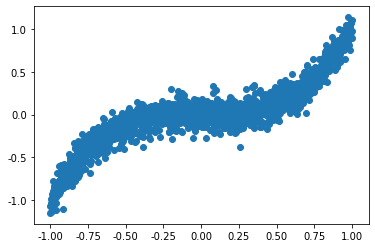

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9


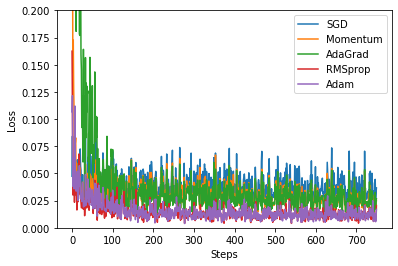

In [302]:
# 测试不同优化算法
torch.manual_seed(1)  # 确定随机种子，保证结果可重复

LR = 0.01
BATCH_SIZE = 20
EPOCH = 10

# 生成数据
x = torch.unsqueeze(torch.linspace(-1, 1, 1500), dim=1)
y = x.pow(3) + 0.1 * torch.normal(torch.zeros(*x.size()))

# 绘制数据分布
plt.scatter(x.numpy(), y.numpy())
plt.show()

# 把数据转换为torch类型
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, )


# 定义模型
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)  # 隐藏层
        self.predict = torch.nn.Linear(20, 1)  # 输出层

    def forward(self, x):
        # pdb.set_trace()
        x = F.relu(self.hidden(x))  # 隐藏层的激活函数
        x = self.predict(x)  # 线性输出
        return x


# 不同的网络模型
net_SGD = Net()
net_Momentum = Net()
net_RMSprop = Net()
net_AdaGrad = Net()
net_Adam = Net()

nets = [net_SGD, net_Momentum, net_AdaGrad, net_RMSprop, net_Adam]
# 不同的优化器
opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)

opt_AdaGrad = torch.optim.Adagrad(net_AdaGrad.parameters(), lr=LR)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_AdaGrad, opt_RMSprop, opt_Adam]

loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], [], []]  # 记录loss用

# 模型训练
for epoch in range(EPOCH):
    print('Epoch: ', epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)
        #print(b_x.size(),step)

        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)  # 前向算法的结果
            loss = loss_func(output, b_y)  # 计算loss
            opt.zero_grad()  # 梯度清零
            loss.backward()  # 后向算法，计算梯度
            opt.step()  # 应用梯度
            l_his.append(loss.data.item())  # 记录loss

labels = ['SGD', 'Momentum', 'AdaGrad', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()

In [305]:
# MNIST
# Hyper Parameters   配置参数
torch.manual_seed(1)  # 设置随机数种子，确保结果可重复
input_size = 784  #
hidden_size = 500
num_classes = 10
num_epochs = 5  # 训练次数
batch_size = 100  # 批处理大小
learning_rate = 0.001  # 学习率

# MNIST Dataset  下载训练集 MNIST 手写数字训练集
train_dataset = dsets.MNIST(root='./data',  # 数据保持的位置
                            train=True,  # 训练集
                            transform=transforms.ToTensor(),  # 一个取值范围是[0,255]的PIL.Image
                            # 转化为取值范围是[0,1.0]的torch.FloadTensor
                            download=True)  # 下载数据

test_dataset = dsets.MNIST(root='./data',
                           train=False,  # 测试集
                           transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
# 数据的批处理，尺寸大小为batch_size,
# 在训练集中，shuffle 必须设置为True, 表示次序是随机的
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


# Neural Network Model (1 hidden layer)  定义神经网络模型
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


net = Net(input_size, hidden_size, num_classes)
# 打印模型
print(net)

# Loss and Optimizer  定义loss和optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# Train the Model   开始训练
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  # 批处理
        # Convert torch tensor to Variable
        #print(images.size())
        images = Variable(images.view(-1, 28 * 28))
        labels = Variable(labels)

        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer  #梯度清零，以免影响其他batch
        outputs = net(images)  # 前向传播

        # import pdb
        # pdb.set_trace()
        loss = criterion(outputs, labels)  # loss 
        loss.backward()  # 后向传播，计算梯度
        optimizer.step()  # 梯度更新

        if (i + 1) % 100 == 0:
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                  % (epoch + 1, num_epochs, i + 1, len(train_dataset) // batch_size, loss.data.item()))

# Test the Model
correct = 0
total = 0
for images, labels in test_loader:  # test set 批处理
    images = Variable(images.view(-1, 28 * 28))
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)  # 预测结果
    total += labels.size(0)  # 正确结果
    correct += (predicted == labels).sum()  # 正确结果总数

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

# Save the Model
torch.save(net.state_dict(), 'mnist_dnn_model.pkl')

Net(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)
Epoch [1/5], Step [100/600], Loss: 0.3793
Epoch [1/5], Step [200/600], Loss: 0.1680
Epoch [1/5], Step [300/600], Loss: 0.2315
Epoch [1/5], Step [400/600], Loss: 0.2143
Epoch [1/5], Step [500/600], Loss: 0.2044
Epoch [1/5], Step [600/600], Loss: 0.1387
Epoch [2/5], Step [100/600], Loss: 0.1129
Epoch [2/5], Step [200/600], Loss: 0.0445
Epoch [2/5], Step [300/600], Loss: 0.1440
Epoch [2/5], Step [400/600], Loss: 0.0942
Epoch [2/5], Step [500/600], Loss: 0.1185
Epoch [2/5], Step [600/600], Loss: 0.0455
Epoch [3/5], Step [100/600], Loss: 0.0329
Epoch [3/5], Step [200/600], Loss: 0.0378
Epoch [3/5], Step [300/600], Loss: 0.0441
Epoch [3/5], Step [400/600], Loss: 0.0858
Epoch [3/5], Step [500/600], Loss: 0.0445
Epoch [3/5], Step [600/600], Loss: 0.0863
Epoch [4/5], Step [100/600], Loss: 0.0432
Epoch [4/5], Step [200/600], Loss: 0.1043
Epoch [4/5], 

# CNN
## 卷积
1）卷积概念：参考[如何通俗易懂地解释卷积](https://www.zhihu.com/question/22298352/answer/228543288)

2）权值共享：图片的底层特征是与特征在图片中的位置无关的，每个卷积核共享参数给隐藏层神经元，可以有多个卷积核提取不同特征

在pytorch中，卷积核深度必须与输入数据一致，如输入数据3 * 32 * 32,则卷积核必须是3 * a * b,通常，a=b=3或者5；同时需要指定卷积层输出数量，以及它们的排列方式、滑动步长和边界填充。

卷积核输出空间计算：floor((W - F + 2P)/S + 1),其中W为输入数据如5×5，W=5，F为卷积核大小，3×3，F=3，P表示边界填充0的数量，S为步长

## 池化层
图片具有局部不变性，通过下采样也不会丢失信息。一般有2种方式，max pooling，mean pooling

## 经典模型
LeNet-5，AlexNet，VGGNet（泛化性好，可用作迁移学习@TODO）

In [319]:
# 配置参数
torch.manual_seed(
    1)  # 设置随机数种子，确保结果可重复
batch_size = 128  # 批处理大小
learning_rate = 1e-2  # 学习率
num_epoches = 10  # 训练次数

# 下载训练集 MNIST 手写数字训练集
train_dataset = datasets.MNIST(
    root='./data',  # 数据保持的位置
    train=True,  # 训练集
    transform=transforms.ToTensor(),  # 一个取值范围是[0,255]的PIL.Image
    # 转化为取值范围是[0,1.0]的torch.FloadTensor
    download=True)  # 下载数据

test_dataset = datasets.MNIST(
    root='./data',
    train=False,  # 测试集
    transform=transforms.ToTensor())

# 数据的批处理，尺寸大小为batch_size,
# 在训练集中，shuffle 必须设置为True, 表示次序是随机的
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# 定义卷积神经网络模型
class Cnn(nn.Module):
    def __init__(self, in_dim, n_class):  # 28x28x1
        super(Cnn, self).__init__()
        self.conv = nn.Sequential(
            # floor((W - F + 2P)/S + 1) = 26
            nn.Conv2d(in_dim, 6, 3, stride=1, padding=1),  # 28 x28
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),  # 14 x 14
            # 同上，只是输入变为14
            nn.Conv2d(6, 16, 5, stride=1, padding=0),  # 16 * 10 * 10
            nn.ReLU(True)
            nn.MaxPool2d(2, 2)
        )  # 16 × 5 × 5
        self.fc = nn.Sequential(
            nn.Linear(400, 120),  # 400 = 5 * 5 * 16
            nn.Linear(120, 84),
            nn.Linear(84, n_class))

    def forward(self, x):
        out = self.conv(x)
        out = out.view(out.size(0), 400)  # 400 = 5 * 5 * 16, 
        out = self.fc(out)
        return out


# 打印模型
model = Cnn(1, 10)  # 图片大小是28x28, 10

# 打印模型
print(model)

# 定义loss和optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 开始训练
for epoch in range(num_epoches):
    print('epoch {}'.format(epoch + 1))
    print('*' * 10)
    running_loss = 0.0
    running_acc = 0.0
    for i, data in enumerate(train_loader, 1):  # 批处理
        img, label = data
        img = Variable(img)
        label = Variable(label)
        # 前向传播 
        out = model(img)
        loss = criterion(out, label)  # loss
        running_loss += loss.data.item() * label.size(0)  # total loss , 由于loss 是batch 取均值的，需要把batch size 乘回去
        _, pred = torch.max(out, 1)  # 预测结果
        num_correct = (pred == label).sum()  # 正确结果的num
        # accuracy = (pred == label).float().mean() #正确率
        
        running_acc += num_correct.data.item()  # 正确结果的总数
        # 后向传播
        optimizer.zero_grad()  # 梯度清零，以免影响其他batch
        loss.backward()  # 后向传播，计算梯度
        optimizer.step()  # 梯度更新

        # if i % 300 == 0:
        #    print('[{}/{}] Loss: {:.6f}, Acc: {:.6f}'.format(
        #        epoch + 1, num_epoches, running_loss / (batch_size * i),
        #        running_acc / (batch_size * i)))
    # 打印一个循环后，训练集合上的loss 和 正确率
    print('Train Finish {} epoch, Loss: {:.6f}, Acc: {:.6f}'.format(
        epoch + 1, running_loss / (len(train_dataset)), running_acc / (len(
            train_dataset))))

# 模型测试， 由于训练和测试 BatchNorm, Dropout配置不同，需要说明是否模型测试
model.eval()
eval_loss = 0
eval_acc = 0
for data in test_loader:  # test set 批处理
    img, label = data

    img = Variable(img, volatile=True)  # volatile 确定你是否不调用.backward(), 测试中不需要
    label = Variable(label, volatile=True)
    out = model(img)  # 前向算法 
    loss = criterion(out, label)  # 计算 loss
    eval_loss += loss.data.item() * label.size(0)  # total loss
    _, pred = torch.max(out, 1)  # 预测结果
    num_correct = (pred == label).sum()  # 正确结果
    eval_acc += num_correct.data.item()  # 正确结果总数

print('Test Loss: {:.6f}, Acc: {:.6f}'.format(eval_loss / (len(
    test_dataset)), eval_acc * 1.0 / (len(test_dataset))))

# 保存模型
torch.save(model.state_dict(), './cnn.pth')

Cnn(
  (conv): Sequential(
    (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): Linear(in_features=120, out_features=84, bias=True)
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)
epoch 1
**********
Train Finish 1 epoch, Loss: 2.285355, Acc: 0.247600
epoch 2
**********
Train Finish 2 epoch, Loss: 1.359288, Acc: 0.639500
epoch 3
**********
Train Finish 3 epoch, Loss: 0.409777, Acc: 0.878650
epoch 4
**********
Train Finish 4 epoch, Loss: 0.294699, Acc: 0.911100
epoch 5
**********
Train Finish 5 epoch, Loss: 0.233624, Acc: 0.929100
epoch 6
**********
Train Finish 6 epoch, Loss: 0.1

/home/hdw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/home/hdw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


Test Loss: 0.098699, Acc: 0.970500


# 自编码器
是一种利用反向传播算法使得输出值等于输入值的神经网络，它先将输入压缩成潜在空间表征，然后通过这种表征来重构输出。

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!

epoch [1/200], loss:1.0558
epoch [2/200], loss:0.8605
epoch [3/200], loss:0.6947
epoch [4/200], loss:0.5424
epoch [5/200], loss:0.4251
epoch [6/200], loss:0.3420
epoch [7/200], loss:0.2646
epoch [8/200], loss:0.2196
epoch [9/200], loss:0.1822
epoch [10/200], loss:0.1578
epoch [11/200], loss:0.1396
epoch [12/200], loss:0.1261
epoch [13/200], loss:0.1199
epoch [14/200], loss:0.1073
epoch [15/200], loss:0.1055
epoch [16/200], loss:0.0972
epoch [17/200], loss:0.0908
epoch [18/200], loss:0.0948
epoch [19/200], loss:0.0896
epoch [20/200], loss:0.0809
epoch [21/200], loss:0.0820
epoch [22/200], loss:0.0857
epoch [23/200], loss:0.0804
epoch [24/200], loss:0.0758
epoch [25/200], loss:0.0782
epoch [26/200], loss:0.0733
epoch [27/200], loss:0.0737
epoch [28/200], loss:0.0712
epoch [29/200], loss:0.0698
epoch [30/200], loss:0.0653
epoch [31/200], loss:0.0635
epoch [32/200], loss:0.0609
epoch [33/200], loss:0.0618


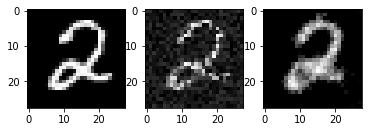

tensor(2)


In [321]:
# 配置参数
torch.manual_seed(1) #设置随机数种子，确保结果可重复
n_epoch = 200 #训练次数
batch_size = 100 #批处理大小
learning_rate = 0.0002 #学习率

#下载训练集 MNIST 手写数字训练集
mnist_train = dsets.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(dataset=mnist_train,batch_size=batch_size,shuffle=True)

# Encoder 模型设置
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.layer1 = nn.Sequential(
                        nn.Conv2d(1,32,3,padding=1),   # batch x 32 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.Conv2d(32,32,3,padding=1),   # batch x 32 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.Conv2d(32,64,3,padding=1),  # batch x 64 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(64),
                        nn.Conv2d(64,64,3,padding=1),  # batch x 64 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(64),
                        nn.MaxPool2d(2,2)   # batch x 64 x 14 x 14
        )
        self.layer2 = nn.Sequential(
                        nn.Conv2d(64,128,3,padding=1),  # batch x 128 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.Conv2d(128,128,3,padding=1),  # batch x 128 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.MaxPool2d(2,2),
                        nn.Conv2d(128,256,3,padding=1),  # batch x 256 x 7 x 7
                        nn.ReLU()
        )
        


# Encoder 模型设置
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.layer1 = nn.Sequential(
                        nn.Conv2d(1,32,3,padding=1),   # batch x 32 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.Conv2d(32,32,3,padding=1),   # batch x 32 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.Conv2d(32,64,3,padding=1),  # batch x 64 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(64),
                        nn.Conv2d(64,64,3,padding=1),  # batch x 64 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(64),
                        nn.MaxPool2d(2,2)   # batch x 64 x 14 x 14
        )
        self.layer2 = nn.Sequential(
                        nn.Conv2d(64,128,3,padding=1),  # batch x 128 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.Conv2d(128,128,3,padding=1),  # batch x 128 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.MaxPool2d(2,2),
                        nn.Conv2d(128,256,3,padding=1),  # batch x 256 x 7 x 7
                        nn.ReLU()
        )
                
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(batch_size, -1)
        return out
    
#encoder = Encoder().cuda()
encoder = Encoder()
# decoder模型设置

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.layer1 = nn.Sequential(
                        nn.ConvTranspose2d(256,128,3,2,1,1), # batch x 128 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.ConvTranspose2d(128,128,3,1,1),   # batch x 128 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.ConvTranspose2d(128,64,3,1,1),    # batch x 64 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(64),
                        nn.ConvTranspose2d(64,64,3,1,1),     # batch x 64 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(64)
        )
        self.layer2 = nn.Sequential(
                        nn.ConvTranspose2d(64,32,3,1,1),     # batch x 32 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.ConvTranspose2d(32,32,3,1,1),     # batch x 32 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.ConvTranspose2d(32,1,3,2,1,1),    # batch x 1 x 28 x 28
                        nn.ReLU()
        )
        
    def forward(self,x):
        out = x.view(batch_size,256,7,7)
        out = self.layer1(out)
        out = self.layer2(out)
        return out
        
        
#decoder = Decoder().cuda()
decoder = Decoder()

parameters = list(encoder.parameters())+ list(decoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=learning_rate)

# 噪声
noise = torch.rand(batch_size,1,28,28)
for i in range(n_epoch):
    for image,label in train_loader:
        image_n = torch.mul(image+0.25, 0.1 * noise)
        #image = Variable(image).cuda()
        image = Variable(image)
        #image_n = Variable(image_n).cuda()
        image_n = Variable(image_n)
        optimizer.zero_grad()
        output = encoder(image_n)
        output = decoder(output)
        loss = loss_func(output,image)
        loss.backward()
        optimizer.step()
        break
    print('epoch [{}/{}], loss:{:.4f}'
          .format(i + 1, n_epoch, loss.data.item()))
          
          

img = image[0].cpu()
input_img = image_n[0].cpu()
output_img = output[0].cpu()
origin = img.data.numpy()
inp = input_img.data.numpy()
out = output_img.data.numpy()
plt.figure('denoising autodecoder')
plt.subplot(131)
plt.imshow(origin[0],cmap='gray')
plt.subplot(132)
plt.imshow(inp[0],cmap='gray')
plt.subplot(133)
plt.imshow(out[0],cmap="gray")
plt.show()
print(label[0])

In [368]:
import re

# 过滤不了\\ \ 中文（）还有————
r1 = u'[a-zA-Z0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'#用户也可以在此进行自定义过滤字符 
# 者中规则也过滤不完全
r2 = "[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+"
# \\\可以过滤掉反向单杠和双杠，/可以过滤掉正向单杠和双杠，第一个中括号里放的是英文符号，第二个中括号里放的是中文符号，第二个中括号前不能少|，否则过滤不完全
r3 =  "[.!//_,$&%^*()<>+\"'?@#-|:~{}]+|[——！\\\\，。=？、：“”‘’《》【】￥……（）]+" 
# 去掉括号和括号内的所有内容
r4 =  "\\【.*?】+|\\《.*?》+|\\#.*?#+|[.!/_,$&%^*()<>+""'?@|:~{}#]+|[——！\\\，。=？、：“”‘’￥……（）《》【】]"

test_sentence = []
with open("三国演义_cut.txt") as fp:
    i = 0
    for line in fp.readlines():
        if i > 100:
            break
        line = line.strip()
        cleanr = re.compile(r4)
        line = re.sub(r4,'',line)
        line = line.replace('  ', ' ')
        toks = line.split(" ")
        for tok in toks:
            if tok == '' or tok == '\ufeff' or tok == '\u3000':
                continue
            else:
                test_sentence.append(tok)
        i += 1
        
print(test_sentence)

['正文', '第一回', '宴', '桃园', '豪杰', '三', '结义', '斩', '黄巾', '英雄', '首', '立功', '滚滚', '长江', '东', '逝水', '浪花', '淘尽', '英雄', '是非成败', '转头', '空', '青山', '依旧', '在', '几度', '夕阳红', '白发', '渔樵', '江渚上', '惯', '看', '秋月春风', '一壶', '浊酒', '喜相逢', '古今', '多少', '事', '都', '付', '笑谈', '中', '调寄', '话', '说', '天下', '大势', '分久必合', '合久必分', '周末', '七', '国', '分争', '并入', '于', '秦', '及', '秦灭', '之后', '楚', '汉', '分争', '又', '并入', '于汉', '汉朝', '自', '高祖', '斩', '白蛇', '而', '起义', '一统天下', '后来', '光武', '中兴', '传至', '献帝', '遂', '分为', '三国', '推其致', '乱', '之', '由', '殆', '始于', '桓', '灵', '二帝', '桓帝', '禁锢', '善类', '崇信', '宦官', '及桓帝', '崩', '灵帝', '即位', '大将军', '窦武', '太傅陈', '蕃', '共', '相', '辅佐', '时有', '宦官', '曹节', '等', '弄权', '窦武', '陈蕃', '谋', '诛', '之', '机事不密', '反为', '所害', '中', '涓', '自此', '愈横', '建宁', '二年', '四月', '望', '日', '帝御', '温德殿', '方', '升座', '殿角', '狂风', '骤起', '只见', '一条', '大', '青蛇', '从', '梁上', '飞', '将', '下来', '蟠于', '椅上', '帝惊', '倒', '左右', '急救', '入宫', '百官', '俱奔避', '须臾', '蛇', '不见', '了', '忽然', '大雷', '大雨', '加以', '冰雹', '落到', '半夜', '方止', '坏', '却', '房屋', '无数', '建宁', '四年', 

In [378]:

# 参数设置
torch.manual_seed(1)
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
N_EPHCNS = 30

# 语料
test_sentence = """Word embeddings are dense vectors of real numbers, 
one per word in your vocabulary. In NLP, it is almost always the case 
that your features are words! But how should you represent a word in a
computer? You could store its ascii character representation, but that
only tells you what the word is, it doesn’t say much about what it means 
(you might be able to derive its part of speech from its affixes, or properties 
from its capitalization, but not much). Even more, in what sense could you combine 
these representations?""".split()

test_sentence = []
with open("三国演义_cut.txt") as fp:
    i = 0
    for line in fp.readlines():
        if i > 100:
            break
        line = line.strip()
        cleanr = re.compile(r4)
        line = re.sub(r4,'',line)
        line = line.replace('  ', ' ')
        toks = line.split(" ")
        for tok in toks:
            if tok == '' or tok == '\ufeff' or tok == '\u3000':
                continue
            else:
                test_sentence.append(tok)
        i += 1
# 三元模型语料准备
trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2])
            for i in range(len(test_sentence) - 2)]

vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}
idx_to_word = {word_to_ix[word]: word for word in word_to_ix}


# 语言模型
class NGramLanguageModeler(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out)
        return log_probs


# loss 函数和优化器
loss_function = nn.NLLLoss()
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# 训练语言模型
for epoch in range(N_EPHCNS):
    total_loss = torch.Tensor([0])
    for context, target in trigrams:
        # Step 1. 准备数据
        context_idxs = [word_to_ix[w] for w in context]
        context_var = torch.autograd.Variable(torch.LongTensor(context_idxs))

        # Step 2 梯度初始化
        model.zero_grad()

        # Step 3. 前向算法
        log_probs = model(context_var)

        # Step 4. 计算loss
        loss = loss_function(log_probs, torch.autograd.Variable(
            torch.LongTensor([word_to_ix[target]])))

        # Step 5. 后向算法和更新梯度
        loss.backward()
        optimizer.step()

        # step 6. loss
        total_loss += loss.data
    # 打印 loss
    print('\r epoch[{}] - loss: {:.6f}'.format(epoch, total_loss[0]))



/home/hdw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


 epoch[0] - loss: 51509.125000
 epoch[1] - loss: 50869.054688
 epoch[2] - loss: 50236.718750
 epoch[3] - loss: 49639.898438
 epoch[4] - loss: 49105.019531
 epoch[5] - loss: 48610.695312
 epoch[6] - loss: 48157.171875
 epoch[7] - loss: 47744.054688
 epoch[8] - loss: 47363.781250
 epoch[9] - loss: 47009.031250
 epoch[10] - loss: 46674.066406
 epoch[11] - loss: 46353.925781
 epoch[12] - loss: 46043.464844
 epoch[13] - loss: 45738.414062
 epoch[14] - loss: 45434.460938
 epoch[15] - loss: 45128.375000
 epoch[16] - loss: 44817.347656
 epoch[17] - loss: 44499.414062
 epoch[18] - loss: 44172.179688
 epoch[19] - loss: 43834.394531
 epoch[20] - loss: 43484.363281
 epoch[21] - loss: 43121.363281
 epoch[22] - loss: 42743.855469
 epoch[23] - loss: 42350.535156
 epoch[24] - loss: 41940.449219
 epoch[25] - loss: 41512.355469
 epoch[26] - loss: 41065.519531
 epoch[27] - loss: 40598.679688
 epoch[28] - loss: 40111.261719
 epoch[29] - loss: 39602.234375


In [377]:
word, label = trigrams[2]
print(word,label)
word = torch.autograd.Variable(torch.LongTensor([word_to_ix[i] for i in word]))

out = model(word)
print(out)
_, predict_label = torch.max(out, 1)
print(predict_label,idx_to_word)
predict_word = idx_to_word[predict_label.data.item()]
print('real word is {}, predict word is {}'.format(label, predict_word))

['宴', '桃园'] 豪杰
tensor([[-8.6219, -8.2365, -8.5792,  ..., -8.0465, -8.7091, -8.2856]],
       grad_fn=<LogSoftmaxBackward>)
tensor([2635]) {0: '目能', 1: '乡侯', 2: '同日生', 3: '帐下', 4: '山冈', 5: '投军', 6: '极广', 7: '殆', 8: '锯', 9: '无恙', 10: '何人', 11: '故此', 12: '为弟', 13: '不避', 14: '少年', 15: '活路', 16: '详细', 17: '硕之叔', 18: '调寄', 19: '厮', 20: '曲阳', 21: '可解', 22: '我来', 23: '尽皆杀', 24: '命何', 25: '知觉', 26: '同', 27: '之众', 28: '耶', 29: '植素', 30: '撞', 31: '张宝引', 32: '皇子', 33: '伙伴', 34: '簇拥', 35: '众官', 36: '渑池', 37: '言语', 38: '八十二斤', 39: '便', 40: '几番', 41: '董卓', 42: '悬首', 43: '滥官污吏', 44: '无君', 45: '此心', 46: '数郡', 47: '崔毅', 48: '涿县', 49: '大浪', 50: '迁于', 51: '败残', 52: '理会', 53: '助战', 54: '玄德打', 55: '良马', 56: '剑', 57: '硕欲', 58: '今上', 59: '部曲', 60: '王伏', 61: '奋力', 62: '适督', 63: '私谓', 64: '备与帝', 65: '之人乎', 66: '此儿', 67: '势如', 68: '袁术领', 69: '人报', 70: '必为', 71: '盱眙', 72: '破', 73: '改', 74: '于', 75: '良久', 76: '乌程侯', 77: '角遣', 78: '旗上', 79: '袁隗', 80: '伏甲', 81: '一', 82: '今朝', 83: '无须', 84: '骑', 85: '念', 86: '宗亲', 87

/home/hdw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


# 序列模型
带记忆的网络，如LSTM，GRU

In [381]:
import logging as logger

logger.basicConfig(level=logger.DEBUG,
                   format='%(asctime)s %(filename)s[line:%(lineno)d] %(levelname)s %(message)s',
                   datefmt='%Y-%m-%d %H:%M:%S -',
                   filename='log.log',
                   filemode='a')  # or 'w', default 'a'

console = logger.StreamHandler()
console.setLevel(logger.INFO)
formatter = logger.Formatter('%(asctime)s %(name)-6s: %(levelname)-6s %(message)s')
console.setFormatter(formatter)
logger.getLogger('').addHandler(console)

In [382]:
use_cuda = torch.cuda.is_available()

SOS_token = 0
EOS_token = 1
# 中文的时候要设置大一些
MAX_LENGTH = 25


def unicodeToAscii(s):
    '''
    Unicode转换成ASCII，http://stackoverflow.com/a/518232/2809427
    :param s:
    :return:
        '''
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )


def normalizeString(s):
    '''
    转小写，去除非法字符
    :param s:
    :return:
    '''
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    # 中文不能进行下面的处理
    # s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s


class Lang:
    def __init__(self, name):
        '''
        添加 need_cut 可根据语种进行不同的分词逻辑处理
        :param name: 语种名称
        '''
        self.name = name
        self.need_cut = self.name == 'cmn'
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  # 初始化词数为2：SOS & EOS

    def addSentence(self, sentence):
        '''
        从语料中添加句子到 Lang
        :param sentence: 语料中的每个句子
        '''
        if self.need_cut:
            sentence = cut(sentence)
        for word in sentence.split(' '):
            if len(word) > 0:
                self.addWord(word)

    def addWord(self, word):
        '''
        向 Lang 中添加每个词，并统计词频，如果是新词修改词表大小
        :param word:
        '''
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1


def cut(sentence, use_jieba=False):
    '''
    对句子分词。
    :param sentence: 要分词的句子
    :param use_jieba: 是否使用 jieba 进行智能分词，默认按单字切分
    :return: 分词结果，空格区分
    '''
    if use_jieba:
        return ' '.join(jieba.cut(sentence))
    else:
        words = [word for word in sentence]
        return ' '.join(words)


import jieba.posseg as pseg


def tag(sentence):
    words = pseg.cut(sentence)
    result = ''
    for w in words:
        result = result + w.word + "/" + w.flag +" "
    return result


def readLangs(lang1, lang2, reverse=False):
    '''
    :param lang1: 源语言
    :param lang2: 目标语言
    :param reverse: 是否逆向翻译
    :return: 源语言实例，目标语言实例，词语对
    '''
    logger.info("Reading lines...")

    # 读取txt文件并分割成行
    lines = open('data/%s-%s.txt' % (lang1, lang2), encoding='utf-8'). \
        read().strip().split('\n')

    # 按行处理成 源语言-目标语言对，并做预处理
    pairs = [[normalizeString(s) for s in l.split('\t')] for l in lines]

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(lang2)
        output_lang = Lang(lang1)
    else:
        input_lang = Lang(lang1)
        output_lang = Lang(lang2)

    return input_lang, output_lang, pairs


eng_prefixes = (
    "i am ", "i m ",
    "he is", "he s ",
    "she is", "she s",
    "you are", "you re ",
    "we are", "we re ",
    "they are", "they re "
)


def filterPair(p):
    '''
    按自定义最大长度过滤
    '''
    return len(p[0].split(' ')) < MAX_LENGTH and \
           len(p[1].split(' ')) < MAX_LENGTH and \
           p[1].startswith(eng_prefixes)


def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]


def prepareData(lang1, lang2, reverse=False):
    input_lang, output_lang, pairs = readLangs(lang1, lang2, reverse)
    logger.info("Read %s sentence pairs" % len(pairs))
    pairs = filterPairs(pairs)
    logger.info("Trimmed to %s sentence pairs" % len(pairs))
    logger.info("Counting words...")
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
    logger.info("Counted words:")
    logger.info('%s, %d' % (input_lang.name, input_lang.n_words))
    logger.info('%s, %d' % (output_lang.name, output_lang.n_words))
    return input_lang, output_lang, pairs


def indexesFromSentence(lang, sentence):
    '''
    :param lang:
    :param sentence:
    :return:
    '''
    return [lang.word2index[word] for word in sentence.split(' ') if len(word) > 0]


def variableFromSentence(lang, sentence):
    if lang.need_cut:
        sentence = cut(sentence)
    # logger.info("cuted sentence: %s" % sentence)
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    result = Variable(torch.LongTensor(indexes).view(-1, 1))
    if use_cuda:
        return result.cuda()
    else:
        return result


def variablesFromPair(input_lang, output_lang, pair):
    input_variable = variableFromSentence(input_lang, pair[0])
    target_variable = variableFromSentence(output_lang, pair[1])
    return (input_variable, target_variable)


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))